In [1]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
max_words = 10000
max_review_len =200


In [3]:
!wget https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz -O yelp_review_polarity_csv.tgz

--2021-01-19 08:16:23--  https://s3.amazonaws.com/fast-ai-nlp/yelp_review_polarity_csv.tgz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.200.165
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.200.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 166373201 (159M) [application/x-tar]
Saving to: ‘yelp_review_polarity_csv.tgz’

yelp_review_polarit 100%[===================>] 158.67M  54.5MB/s    in 2.9s    

2021-01-19 08:16:26 (54.5 MB/s) - ‘yelp_review_polarity_csv.tgz’ saved [166373201/166373201]



In [4]:
!tar -xvf yelp_review_polarity_csv.tgz

yelp_review_polarity_csv/
yelp_review_polarity_csv/train.csv
yelp_review_polarity_csv/readme.txt
yelp_review_polarity_csv/test.csv


In [5]:
train = pd.read_csv('yelp_review_polarity_csv/train.csv', header = None, names = ['Class', 'Review'])
test = pd.read_csv('yelp_review_polarity_csv/test.csv', header = None, names = ['Class', 'Review'])


In [6]:
reviews = train['Review']
y_train = train['Class']-1
reviews[:5]



0    Unfortunately, the frustration of being Dr. Go...
1    Been going to Dr. Goldberg for over 10 years. ...
2    I don't know what Dr. Goldberg was like before...
3    I'm writing this review to give you a heads up...
4    All the food is great here. But the best thing...
Name: Review, dtype: object

In [7]:
tokenaizer = Tokenizer(num_words=max_words)
tokenaizer.fit_on_texts(reviews)


In [8]:
sequence = tokenaizer.texts_to_sequences(reviews)


In [9]:
index = 0
print(reviews[index])
print(sequence[index])

Unfortunately, the frustration of being Dr. Goldberg's patient is a repeat of the experience I've had with so many other doctors in NYC -- good doctor, terrible staff.  It seems that his staff simply never answers the phone.  It usually takes 2 hours of repeated calling to get an answer.  Who has time for that or wants to deal with it?  I have run into this problem with many other doctors and I just don't get it.  You have office workers, you have patients with medical needs, why isn't anyone answering the phone?  It's incomprehensible and not work the aggravation.  It's with regret that I feel that I have to give Dr. Goldberg 2 stars.
[707, 1, 4339, 7, 173, 939, 1665, 11, 5, 2161, 7, 1, 137, 112, 24, 18, 27, 189, 80, 3128, 10, 2636, 34, 1416, 462, 129, 8, 519, 13, 177, 129, 803, 88, 3812, 1, 446, 8, 392, 841, 115, 360, 7, 4136, 1438, 4, 43, 59, 1266, 118, 95, 46, 9, 13, 49, 1687, 4, 418, 18, 8, 3, 23, 563, 178, 16, 460, 18, 189, 80, 3128, 2, 3, 40, 78, 43, 8, 20, 23, 644, 1343, 20, 23

In [10]:
tokenaizer.word_index['good']

34

In [11]:
x_train = pad_sequences(sequence, maxlen=max_review_len)

In [12]:
x_train[5:]

array([[   0,    0,    0, ...,  922,   28,  393],
       [  11,   38,    5, ...,   52,   10, 1419],
       [   0,    0,    0, ...,    8,  188,   30],
       ...,
       [   0,    0,    0, ...,    4,   82,  297],
       [   0,    0,    0, ...,  209,   42,    2],
       [   0,    0,    0, ...,   27,  103, 5990]], dtype=int32)

In [13]:
model = Sequential()
model.add(Embedding(max_words, 64, input_length=max_review_len))
# model.add(LSTM(8, return_sequences=True))
# model.add(LSTM(32, return_sequences=True))
# model.add(LSTM(32, return_sequences=True))
model.add(LSTM(128))

model.add(Dense(1, activation='sigmoid'))

In [14]:
model_save_path = 'best_LSTM.h5'
check_point = ModelCheckpoint(model_save_path, monitor='val_accuracy', save_best_only=True, verbose =1)

In [15]:
model.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, batch_size=128, epochs=6, validation_split=0.1, callbacks=[check_point])

Epoch 1/6
3938/3938 [==============================] - 123s 29ms/step - loss: 0.2493 - accuracy: 0.8947 - val_loss: 0.1085 - val_accuracy: 0.9587

Epoch 00001: val_accuracy improved from -inf to 0.95866, saving model to best_LSTM.h5
Epoch 2/6
3938/3938 [==============================] - 114s 29ms/step - loss: 0.1258 - accuracy: 0.9528 - val_loss: 0.0979 - val_accuracy: 0.9636

Epoch 00002: val_accuracy improved from 0.95866 to 0.96355, saving model to best_LSTM.h5
Epoch 3/6
3938/3938 [==============================] - 114s 29ms/step - loss: 0.1016 - accuracy: 0.9622 - val_loss: 0.0986 - val_accuracy: 0.9648

Epoch 00003: val_accuracy improved from 0.96355 to 0.96477, saving model to best_LSTM.h5
Epoch 4/6
3938/3938 [==============================] - 117s 30ms/step - loss: 0.0835 - accuracy: 0.9697 - val_loss: 0.0975 - val_accuracy: 0.9652

Epoch 00004: val_accuracy improved from 0.96477 to 0.96518, saving model to best_LSTM.h5
Epoch 5/6
3938/3938 [==============================] - 116s

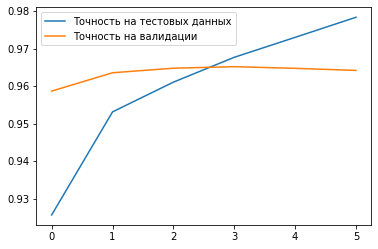

In [17]:
plt.plot(history.history['accuracy'], label = 'Точность на тестовых данных')
plt.plot(history.history['val_accuracy'], label = 'Точность на валидации')
plt.legend()
plt.show()

In [18]:
reviews = test['Review']
y_test = test['Class']-1

test_sequences = tokenaizer.texts_to_sequences(test['Review'])
x_test = pad_sequences(test_sequences, maxlen=max_review_len)


In [19]:



model.load_weights(model_save_path)
score = model.evaluate(x_test,y_test)

1188/1188 [==============================] - 7s 6ms/step - loss: 0.1200 - accuracy: 0.9564


In [20]:
text = 'At each stage, everything had to be pulled out with ticks, the company does not organize tourism in principle. Everything is done in fact and as God sends. God sent us a student of Philology as a guide. Olya rested with us, but did not work, as she came to these places for the first time, as we did.'
seq = tokenaizer.texts_to_sequences([text])
data = pad_sequences(seq, max_review_len)

result = model.predict(data)
print(result)


[[0.22708935]]


In [21]:
w = model.layers[1].get_weights()[0]
